In [2]:
import json
import torch
from torchvision.transforms.functional import to_pil_image
from PIL import Image, ImageEnhance
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os
from aesthetic_predictor_v2_5 import convert_v2_5_from_siglip
import numpy as np
import open_clip
from pathlib import Path
from itertools import combinations
from scipy.stats import wilcoxon, rankdata

/home/antonello03/anaconda3/envs/py31/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-31 17:21:04.005163: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-31 17:21:04.005217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-31 17:21:04.006738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-31 17:21:04.014739: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorF

In [3]:
model, preprocessor = convert_v2_5_from_siglip(
    low_cpu_mem_usage=True,
    trust_remote_code=True,
)
model = model.to(torch.bfloat16).cuda()

/home/antonello03/anaconda3/envs/py31/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


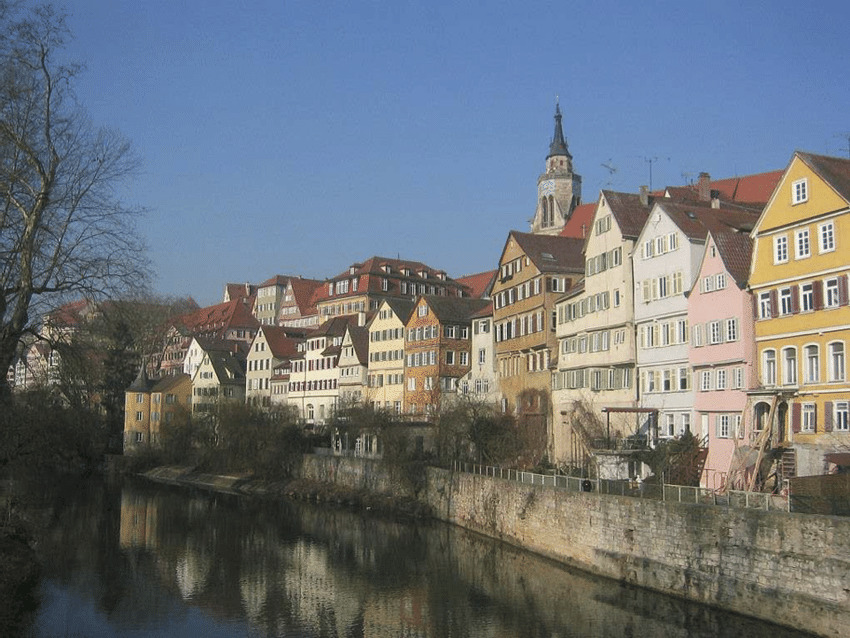

In [4]:
image = Image.open("Tuebingens.jpg").convert("RGB")

image

In [5]:
def aesthetic_score(image):
    """PIL Image -> aesthetic score"""
    pixel_values = (
        preprocessor(images=image, return_tensors="pt")
        .pixel_values.to(torch.bfloat16)
        .cuda()
    )
    pixel_values
    with torch.inference_mode():
        score = model(pixel_values).logits.squeeze().float().cpu().numpy()
    return score

print("Aesthetic score:", aesthetic_score(image))

Aesthetic score: 4.8125


In [7]:
print("Aesthetic score:", aesthetic_score(image))

Aesthetic score: 4.8125
